In [56]:
import simplescript as s
from halpy.halpy import HAL

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


In [57]:
target = 1000
hal = HAL("/tmp/hal")
s.start(hal)

In [59]:
%%time
scores = []
datas = []
KPL = [x/2000 for x in range(10,400, 7)]

for kp in KPL:
    for _ in range(2):
        try:
            s.start(hal)
            pid = s.PID(target, kp, min=0, max=255)
            res = s.simule(hal, pid)
            datas.append(res)
            score = s.score(res, target)
            scores.append(score)
        except TypeError:
            print("Type error", kp)
    
scores_base = scores

Type error 0.026
CPU times: user 14 s, sys: 4.45 s, total: 18.5 s
Wall time: 26min 30s


In [60]:
score_dict = {k: [] for k in s.FNS}
for score in scores:
    for algo, val in score.items():
        score_dict[algo].append(val)

score_dict = {k:[x/max(v) for x in v] for k,v in score_dict.items()}

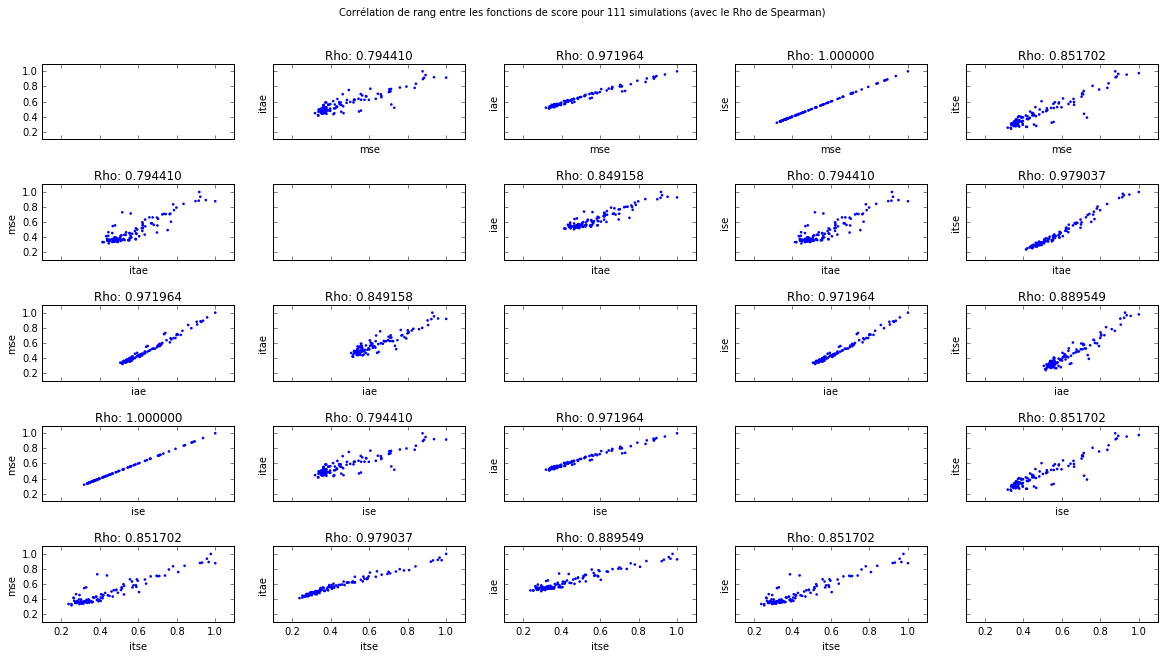

In [141]:
import scipy.stats
lfns = len(s.FNS)
fig, ax =  plt.subplots(lfns, lfns, sharex='all', sharey='all')
plt.subplots_adjust(hspace = 0.6)
plt.suptitle("Corrélation de rang entre les fonctions de score pour %i simulations (avec le Rho de Spearman)" % len(datas))

for i, fni in enumerate(s.FNS):
    for j, fnj in enumerate(s.FNS):
        if i==j:
            continue
        p = ax[i][j]
        p.scatter(score_dict[fni], score_dict[fnj], s=7, edgecolors='none')
        rho, pval = scipy.stats.spearmanr(score_dict[fni], score_dict[fnj])
        p.set_title("Rho: %f" % rho)
        p.axes.set_xlabel(fni.__name__)
        p.axes.set_ylabel(fnj.__name__)

In [69]:
import time
vals = []
for i in range(255):
    hal.animations.strip_white.upload([i])
    time.sleep(0.1)
    try:
        vals.append(s.luxmeter(hal.sensors.lux.value))
        time.sleep(0.1)
    except TypeError:
        vals.append(0)
    

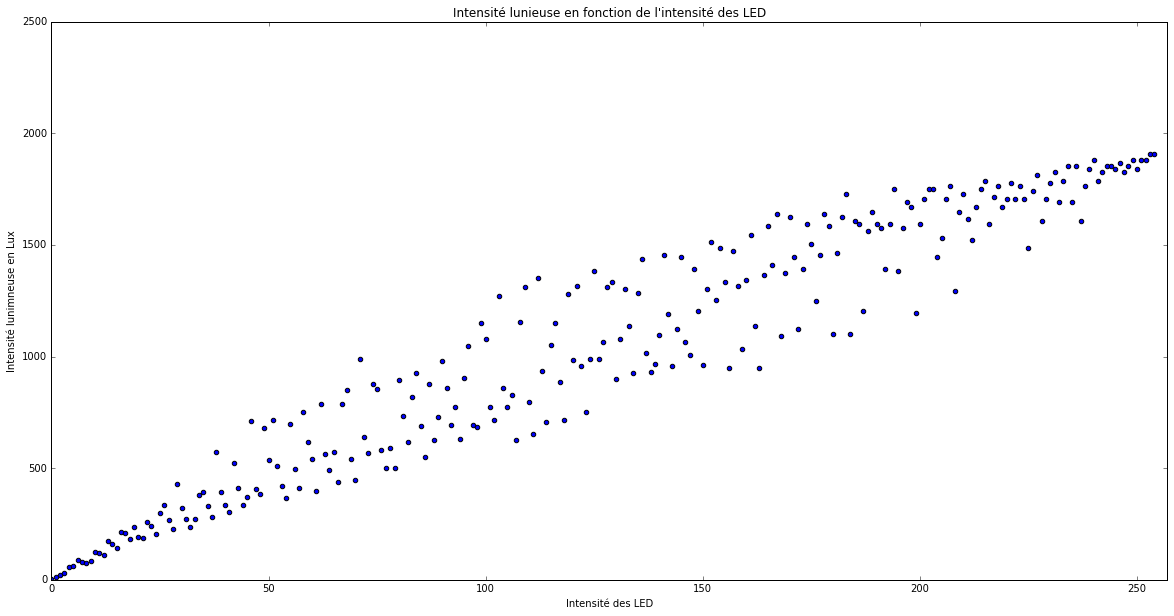

In [137]:
plt.scatter(range(255), vals)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlim((0, 257))
plt.title("Intensité lunieuse en fonction de l'intensité des LED")
plt.xlabel("Intensité des LED")
plt.ylabel("Intensité lunimneuse en Lux");

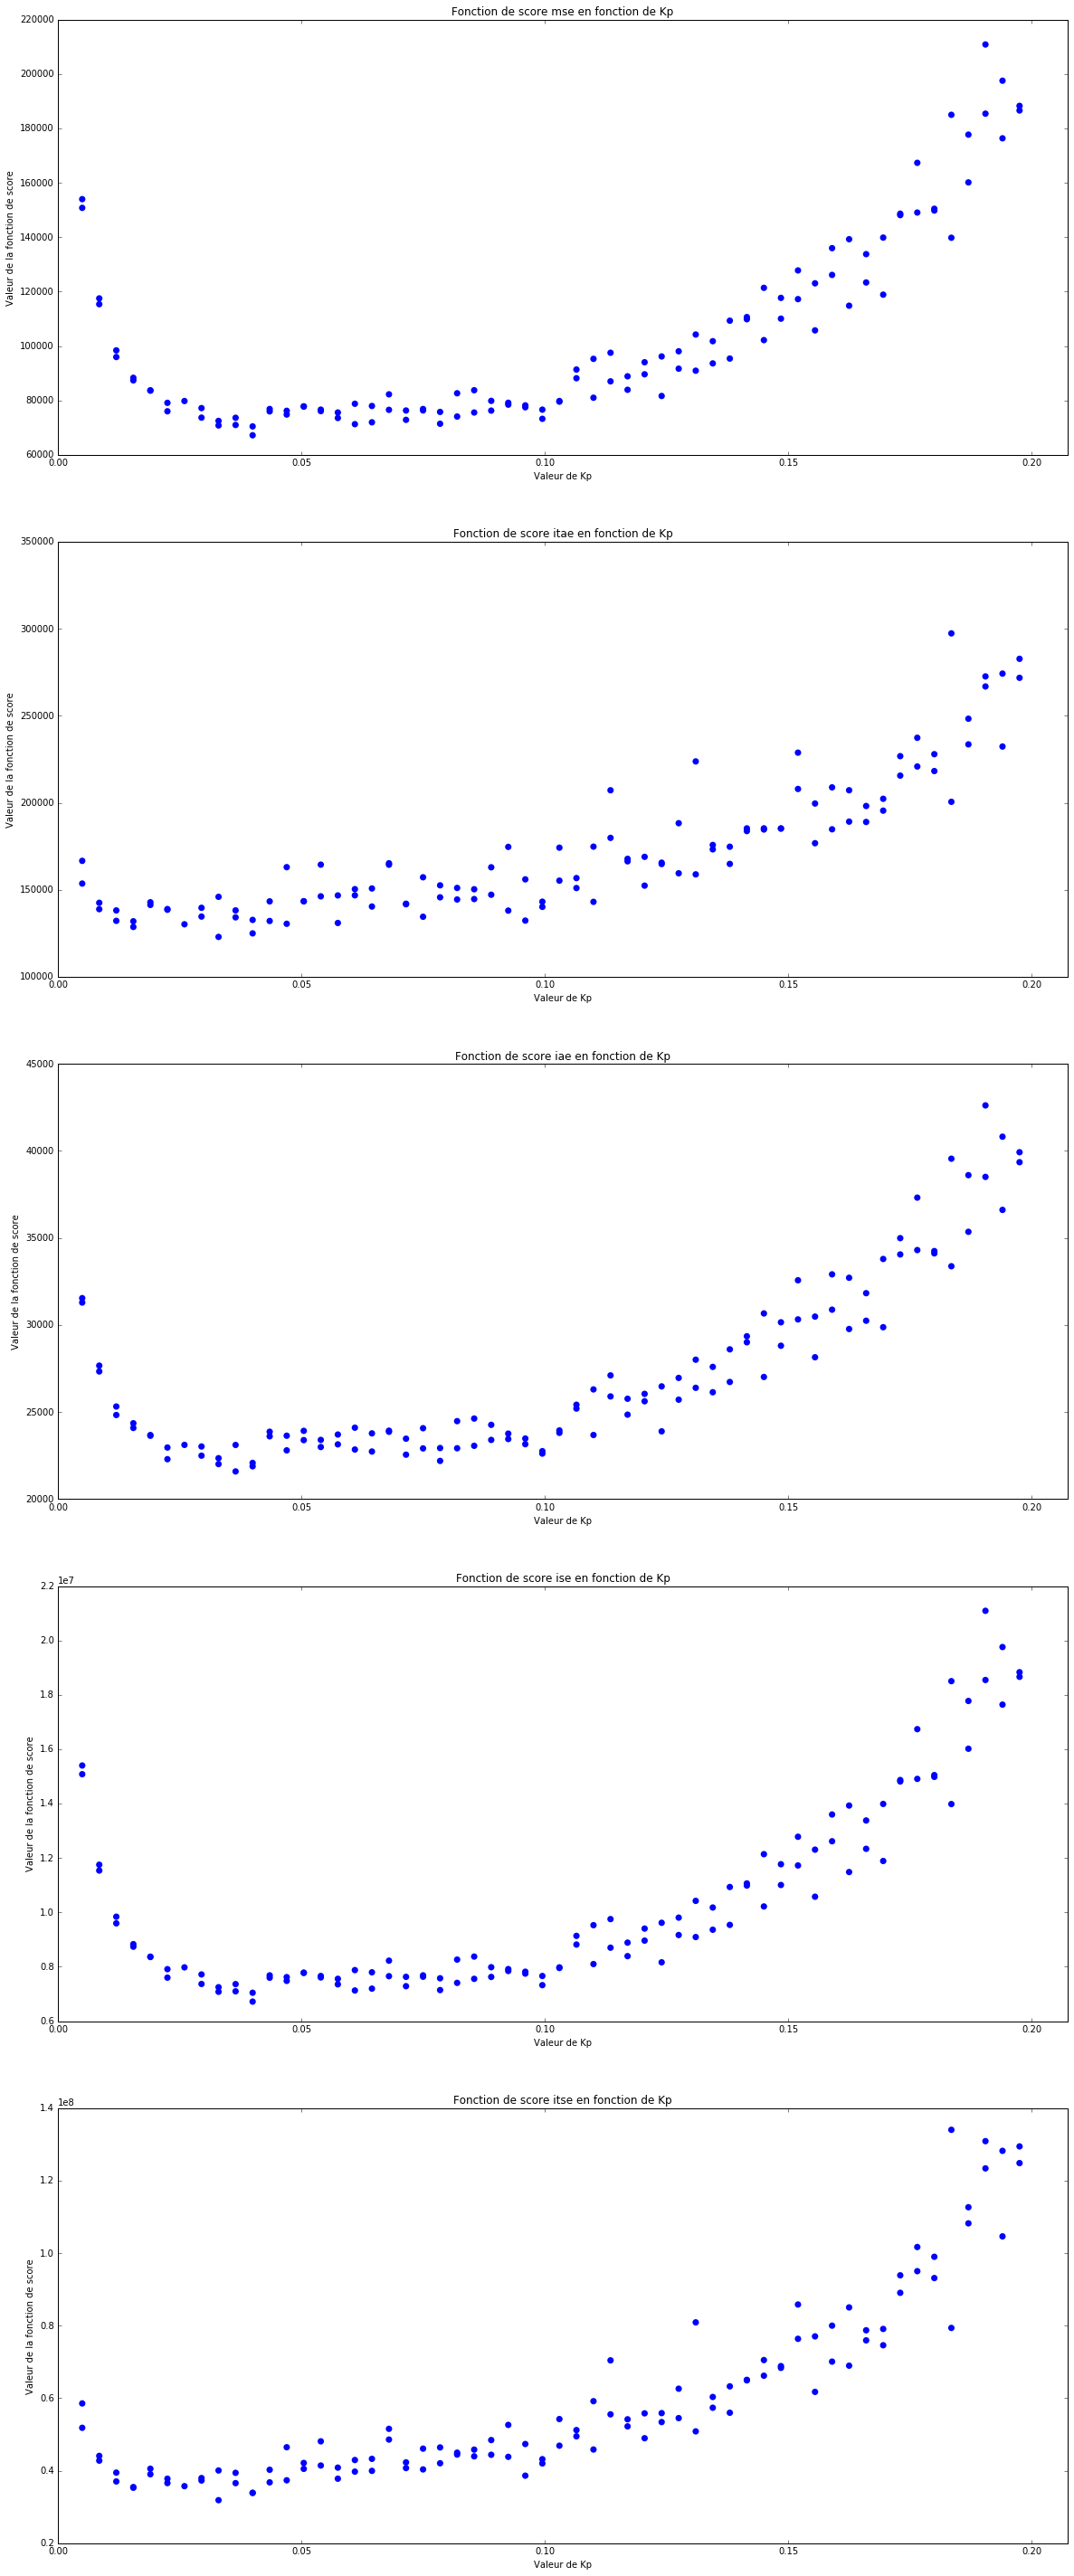

In [129]:
fig, ax =  plt.subplots(lfns, 1, sharex='none', sharey='none')
fig.set_figheight(10 * lfns)
for i, fn in enumerate(s.FNS):
    l = [x/2000 for x in range(10,400, 7)]
    la = [item for sublist in zip(l,l) for item in sublist]
    la.remove(0.026)
    p = ax[i]
    p.scatter(la,[x[fn] for x in scores_base], edgecolors='none', s=50)
    p.set_title("Fonction de score %s en fonction de Kp" % fn.__name__)
    p.axes.set_xlabel("Valeur de Kp")
    p.axes.set_ylabel("Valeur de la fonction de score")
    p.set_xlim((0, max(la)*1.05))

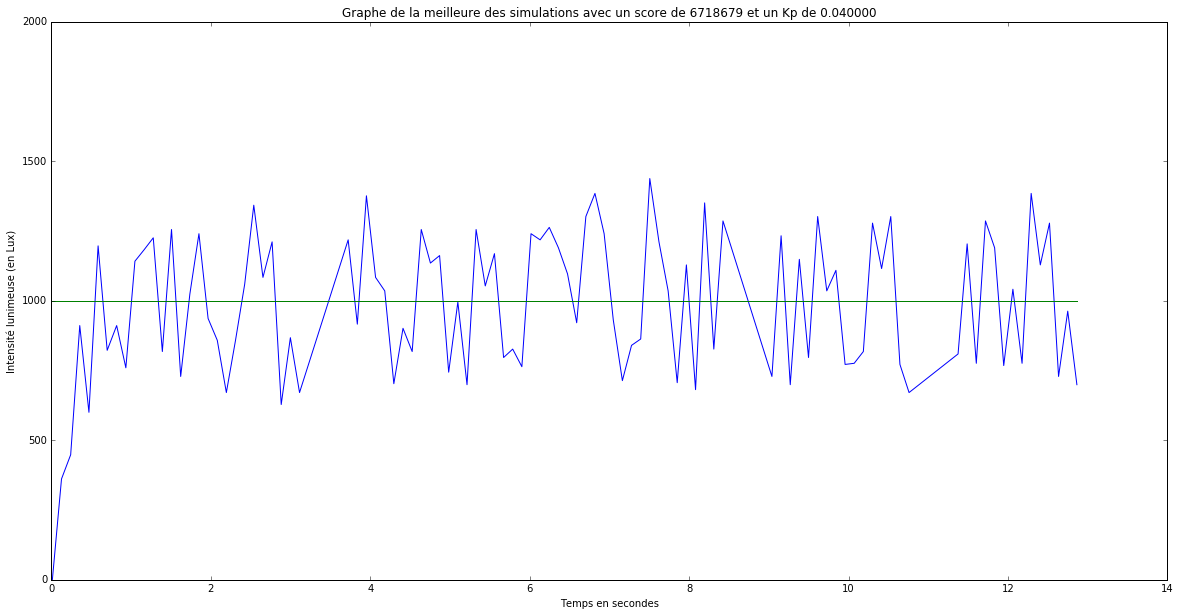

In [160]:
i, _ = min(enumerate(score_dict[s.ise]), key=lambda x: x[1])
best_score = scores_base[i][s.ise]
best_kp = la[i]
simulation = datas[i]
plt.plot([x[1] for x in simulation], [x[0] for x in simulation]);
plt.plot([x[1] for x in simulation], [target for x in simulation])
plt.title("Graphe de la meilleure des simulations avec un score de %i et un Kp de %f" % (best_score, best_kp))
plt.xlabel("Temps en secondes")
plt.ylabel("Intensité lunimeuse (en Lux)")
plt.ylim((0,2000));

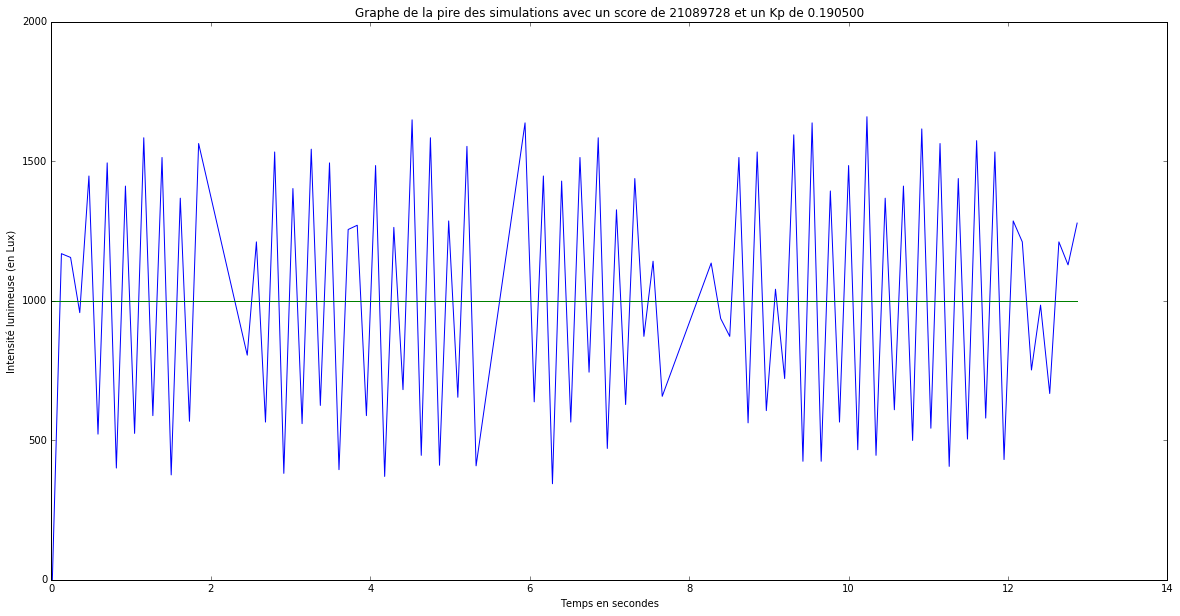

In [159]:
i, _ = max(enumerate(score_dict[s.ise]), key=lambda x: x[1])
worst_score = scores_base[i][s.ise]
worst_kp = la[i]
simulation = datas[i]
plt.plot([x[1] for x in simulation], [x[0] for x in simulation]);
plt.plot([x[1] for x in simulation], [target for x in simulation])
plt.title("Graphe de la pire des simulations avec un score de %i et un Kp de %f" % (worst_score, worst_kp))
plt.xlabel("Temps en secondes")
plt.ylabel("Intensité lunimeuse (en Lux)")
plt.ylim((0,2000));

In [ ]:
ax.set_yscale("log", nonposy='clip')